In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.datasets import load_boston
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.manifold import TSNE
from sklearn.cluster import KMeans

In [2]:
%matplotlib inline

#### Задание 1

In [3]:
boston = load_boston()
boston.keys()

dict_keys(['data', 'target', 'feature_names', 'DESCR'])

In [4]:
data = boston.data
feature_names = boston.feature_names
target = boston.target

In [5]:
X = pd.DataFrame(data, columns=feature_names)
y = pd.DataFrame(target, columns=['Price'])

In [6]:
X.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 506 entries, 0 to 505
Data columns (total 13 columns):
CRIM       506 non-null float64
ZN         506 non-null float64
INDUS      506 non-null float64
CHAS       506 non-null float64
NOX        506 non-null float64
RM         506 non-null float64
AGE        506 non-null float64
DIS        506 non-null float64
RAD        506 non-null float64
TAX        506 non-null float64
PTRATIO    506 non-null float64
B          506 non-null float64
LSTAT      506 non-null float64
dtypes: float64(13)
memory usage: 51.5 KB


In [7]:
y.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 506 entries, 0 to 505
Data columns (total 1 columns):
Price    506 non-null float64
dtypes: float64(1)
memory usage: 4.0 KB


In [8]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [9]:
scaler = StandardScaler()

X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

X_train_scaled = pd.DataFrame(X_train_scaled, columns=feature_names)
X_test_scaled = pd.DataFrame(X_test_scaled, columns=feature_names)

In [10]:
tsne = TSNE(n_components=2, learning_rate=250, random_state=42)

In [11]:
X_train_tsne = tsne.fit_transform(X_train_scaled)

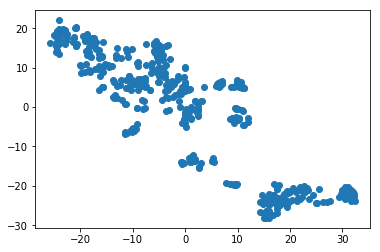

In [12]:
plt.scatter(X_train_tsne[:, 0], X_train_tsne[:, 1])

#### Задание 2

In [48]:
kmeans = KMeans(n_clusters=3, max_iter=100, random_state=42)

In [49]:
labels_train = kmeans.fit_predict(X_train_scaled)

In [50]:
pd.value_counts(labels_train)

0    191
1    128
2     85
dtype: int64

In [51]:
labels_test = kmeans.predict(X_test_scaled)

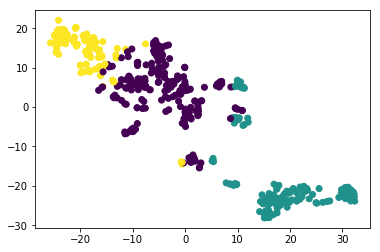

In [57]:
plt.scatter(X_train_tsne[:, 0], X_train_tsne[:, 1], c=labels_train)

#### Средние значения для исходного сета (не скалированного)

In [82]:
x_ = X_train[['CRIM']].copy()
x_['price'] = y_train
x_['tsne_class'] = labels_train

In [83]:
x_.head()

,CRIM,price,tsne_class
477,15.02340,12.0,1
15,0.62739,19.9,0
332,0.03466,19.4,2
423,7.05042,13.4,1
19,0.72580,18.2,0


In [87]:
x_.groupby('tsne_class').mean()

,CRIM,price
tsne_class,,
0,0.420986,24.971204
1,10.637094,16.179688
2,0.072118,27.874118
